# Taller \#1 Procesamiento de imagen con Python
 Asignatura: Vision por Computador \\
 Estudainte: Hector Daniel Vasquez Rivera \\
 Correo: hevasquezr@unal.edu.co

Seguiremos la guia [ "Introduction to Image Processing" ](https://nbviewer.org/github/gpeyre/numerical-tours/blob/master/python/introduction_3_image.ipynb) y se realizaran los mismos precedimientos pero con la libreria openCV de Python

---
## Importar Librerias 📖


In [1]:
!git clone https://github.com/gpeyre/numerical-tours.git #Importamos el repositorio de la guia

Cloning into 'numerical-tours'...
remote: Enumerating objects: 12356, done.
remote: Counting objects: 100% (200/200), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 12356 (delta 111), reused 174 (delta 109), pack-reused 12156
Receiving objects: 100% (12356/12356), 619.13 MiB | 29.25 MiB/s, done.
Resolving deltas: 100% (6365/6365), done.
Updating files: 100% (2788/2788), done.


In [2]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow
from skimage import io
from PIL import Image 
import matplotlib.pyplot as plt

#Para poder usar las funciones de la guia y comparar resultados en algunos casos
import sys
sys.path.append('/content/numerical-tours/python')
from nt_toolbox.general import *
from nt_toolbox.signal import *


%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.9/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


## Procesamiento de Imagen con OpenCV - Parte 1


### Guia Parte 1

>- Cargar imagen en escala de grises

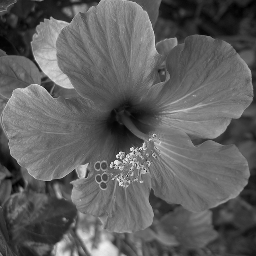

In [3]:
# Podemos importar la imagen directamente en escala de grises 
flor_gray = cv.imread('/content/numerical-tours/python/nt_toolbox/data/hibiscus.bmp',cv.IMREAD_GRAYSCALE)

#Redimencionamos las imagenes y desactivamos la interpolacion para seguir la Guia
n = 256
flor_gray = cv.resize(flor_gray, (n, n), interpolation=cv.INTER_NEAREST) #Sin interpolacion para seguir la guia

# Mostrar la imagen resultante
cv2_imshow(flor_gray)

>- Hacer Zoom en la imagen

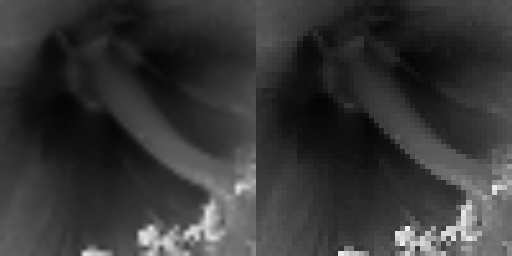

In [4]:
#se encuentra el punto medio
p_medio = int(n/2)

#Vamos a tomar una seccion de la matriz de la imagen de tamaño 50x50
zoom = flor_gray[p_medio-25:p_medio+25,p_medio-25:p_medio+25]

#se redimensiona para ver claramente el zoom
zoom_1 = cv.resize(zoom, (n, n)) #Con Interpolacion
zoom_2 = cv.resize(zoom, (n, n), interpolation=cv.INTER_NEAREST) # Sin Interpolacion

#Se concatenan las dos imagenes
imagen_final = cv.hconcat((zoom_1,zoom_2))

# Mostrar la imagen resultante
cv2_imshow(imagen_final)

>- Imagen en engativo

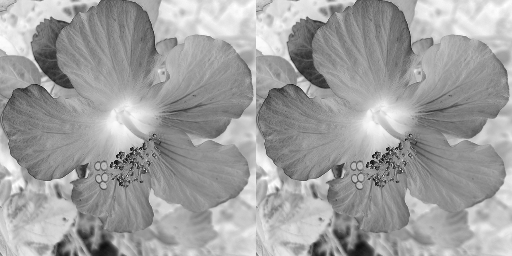

In [5]:
#Imagen en negativo
Negative1 = 255 - flor_gray
 
#Con openCV
Negative2 = cv.bitwise_not(flor_gray)

#Se concatenan las dos imagenes
imagen_final = cv.hconcat((Negative1,Negative2))

# Mostrar la imagen resultante
cv2_imshow(imagen_final)

>- Voltear imagen

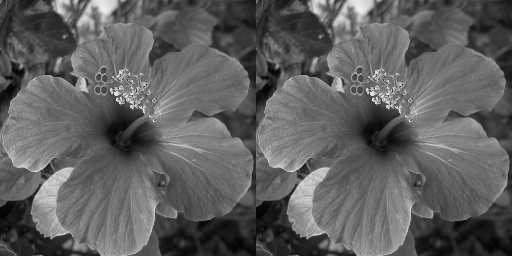

In [6]:
#La imagen se voltea invirtiendo el orden de las filas
V = flor_gray[::-1,:]

#con openCV (0 voltea verticalmente, 1 voltea horizontalmente)
V2 = cv.flip(flor_gray,0)

# Concatenar las imagenes en voltiadas
imagen_final = cv.hconcat((V,V2))

# Mostrar la imagen resultante
cv2_imshow(imagen_final)

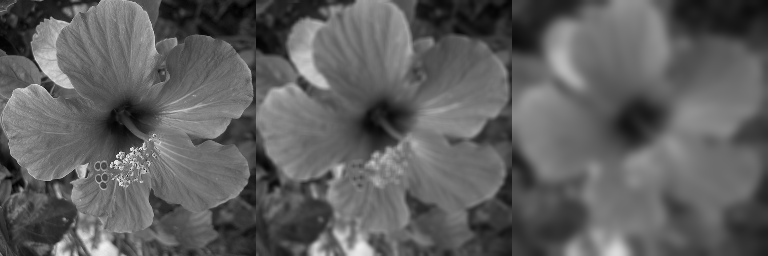

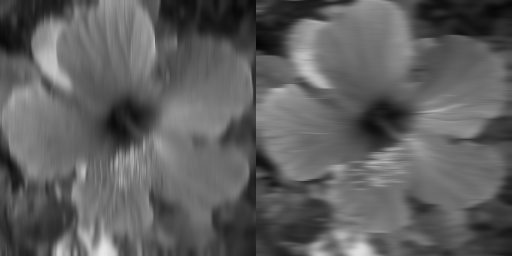

In [7]:
#Desenfoque OpenCV con desviacion 5 y kernerl de 5 y 255
blurring = cv.GaussianBlur(flor_gray, (5, 5), 5)
blurring2 = cv.GaussianBlur(flor_gray, (255, 255), 5)

#Desenfoque no uniforme con OpenCV con desviacion 5 y kernerl de 1 y 255
blurring3 = cv.GaussianBlur(flor_gray, (1, 255), 5) #Desenfoque corrido verticalmente 
blurring4 = cv.GaussianBlur(flor_gray, (255, 1), 5)  #Desenfoque corrido horizontalmente

# Concatenar las imagenes en escala de grises
imagen_final = cv.hconcat((flor_gray, blurring, blurring2))
imagen_final2 = cv.hconcat((blurring3, blurring4))

# Mostrar la imagen resultante
cv2_imshow(imagen_final)
cv2_imshow(imagen_final2)

>-  Detección de bordes de imagen

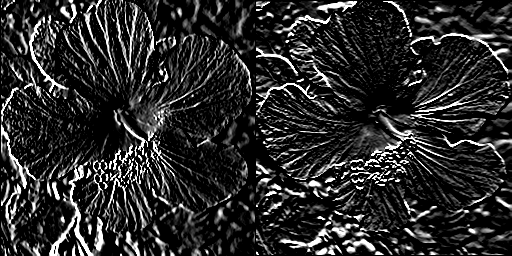

In [8]:
#Calcular el gradiente dx y dy con openCV
dx =cv.Sobel(flor_gray, cv.CV_8U, 1, 0, ksize=3, scale=3)
dy =cv.Sobel(flor_gray, cv.CV_8U, 0, 1, ksize=3, scale=3)

# Concatenar las imagenes en escala de grises
imagen_final = cv.hconcat((dx, dy))

# Mostrar la imagen resultante
cv2_imshow(imagen_final)

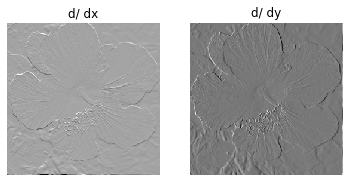

In [9]:
#Calcular el gradiente dx y dy con funcion de la guia
M = load_image('/content/numerical-tours/python/nt_toolbox/data/hibiscus.bmp', n)
G = grad(M)

# Mostrar la imagen resultante
imageplot(G[:,:,0], 'd/ dx', [1, 2, 1])
imageplot(G[:,:,1], 'd/ dy', [1, 2, 2])

>- Transformada de Fourier

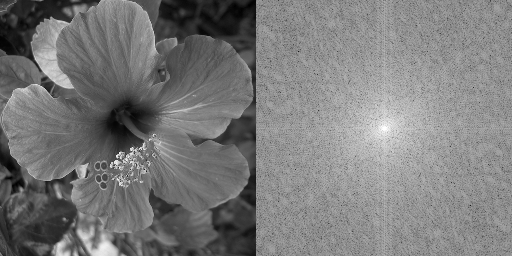

In [10]:
# Calcular la Transformada dicreta de Fourier con openCV
dft = cv.dft(np.float32(flor_gray), flags=cv.DFT_COMPLEX_OUTPUT)

# Cambiar el origen de la Transformada de Fourier 
dft_shift = np.fft.fftshift(dft)

# Calcular el espectro de amplitud
magnitude_spectrum = 20* np.log(cv.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

# Mostrar la imagen original y el espectro de amplitud
flor_gray32 = flor_gray.astype(np.float32) #se cambia el tipo para poder concatenar las imagenes

imagen_final = cv.hconcat((flor_gray32, magnitude_spectrum))
cv2_imshow(imagen_final)


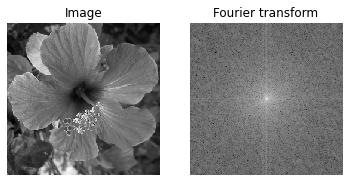

In [11]:
# Calcular la Transformada dicreta de Fourier solamente con Numpy segun la guia
Mf = np.fft.fft2(flor_gray)
Lf = np.fft.fftshift(np.log(abs(Mf) + 1e-1))

# Mostrar la imagen original y el espectro de amplitud
imageplot(flor_gray, 'Image', [1, 2, 1])
imageplot(Lf, 'Fourier transform', [1, 2, 2])

### Resolucion de Ejercicios propuestos en Guia 1

>- Para evitar los artefactos de contorno y estimar realmente el contenido de frecuencia de la imagen (¡y no de los artefactos!), es necesario multiplicar M por una función de ventana suave h y calcular fft2(M*h). Utilice una función de ventana sinusoidal. ¿Puedes interpretar el filtro resultante?

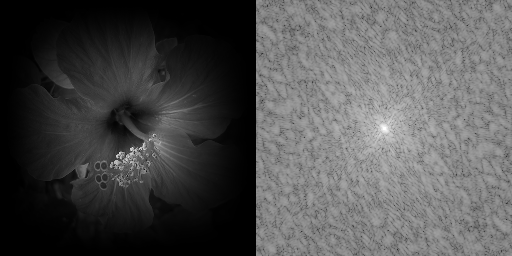

In [12]:
# Solucion ejercicio 1

#Se crea una lista de n valores de -pi a pi
x = np.linspace(-np.pi,np.pi,n)

#Se evalua x en la funcion y nos da como resultado
#una matriz 1xn con valores de 0 a 1
y0 = np.matrix( (np.cos(x)+1)/2 ) 

#Se multiplica la transpuesta de la matriz y0 por la matriz y0
#esto da como resultado un matriz y simetrica de dimensiones nxn 
y = np.array( np.transpose(y0)*y0 )

# Si multiplicamos la matriz 'y' por la matriz de nuestra imagen
# Estariamos volviento los pixeles de las esquinas de la imgane mas oscuros 
flor_filtro = (flor_gray * y)

# Calcular la Transformada dicreta de Fourier con openCV
dft = cv.dft(np.float32(flor_gray*y), flags=cv.DFT_COMPLEX_OUTPUT)

# Cambiar el origen de la Transformada de Fourier 
dft_shift = np.fft.fftshift(dft)

# Calcular el espectro de amplitud
magnitude_spectrum = 20* np.log(cv.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

# Mostrar la imagen con filtro y el espectro de amplitud
flor_filtro = flor_filtro.astype(np.float32) #se cambia el tipo para poder concatenar las imagenes

imagen_final = cv.hconcat((flor_filtro, magnitude_spectrum))
cv2_imshow(imagen_final)

>- Realice un filtrado de paso bajo eliminando las frecuencias altas del espectro. ¿Qué observas?

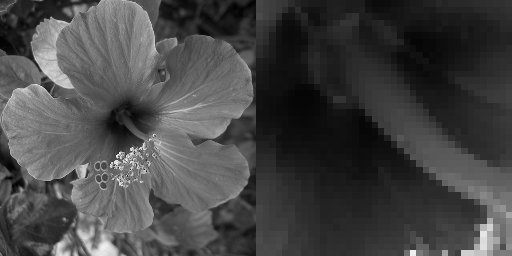

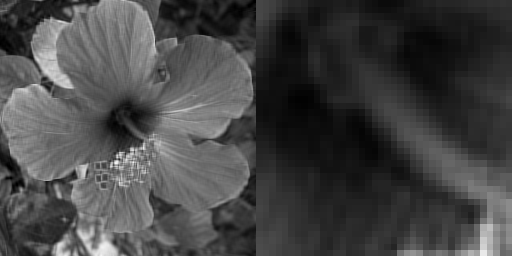

In [13]:
# Solucion ejercicio 2

# Se calcula la transformada rapida de fourier en 2d con Numpy
dft = np.fft.fft2(flor_gray)


k = round(.8*n) #toma un 80% de la imagen redondiada
k = round(k/2)*2 # Se asegura de covertir a K en un numero par
r = int(k/2) # Haya el punto medio de k

# se toma una submatriz de la matriz de la frecuencia de la imagen
# esta submatriz se iguala a 0
dft[p_medio-r+2:p_medio+r, p_medio-r+2:p_medio+r] = 0

#al aplicar la transformada inversa volvemos a tener la imagen
# Sin embargo, esta suviso los cambios de tomo en la imagen
# ya que eliminamos parte de la informacion de la imagen en
# el mundo de la frecuencia
f_low =  np.real( np.fft.ifft2(dft))

#Se realiza un recorte (zoom) en la imagen para apreciar la diferencia
zoom = cv.resize(flor_gray[p_medio-20:p_medio+20,p_medio-20:p_medio+20], (n, n), interpolation=cv.INTER_NEAREST) # Sin Interpolacion
zoom1 = cv.resize(f_low[p_medio-20:p_medio+20,p_medio-20:p_medio+20], (n, n), interpolation=cv.INTER_NEAREST) # Sin Interpolacion

# Se muestra la imagen imagen original y la imagen sin las frecuencias altas
imagen_final = cv.hconcat((flor_gray,zoom))
imagen_final1 = cv.hconcat((f_low,zoom1))

cv2_imshow(imagen_final)
cv2_imshow(imagen_final1)

##Procesamiento de Imagen con OpenCV - Parte 2

>- Se carga la imagen en RGB

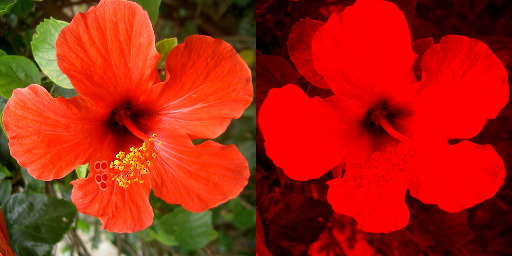

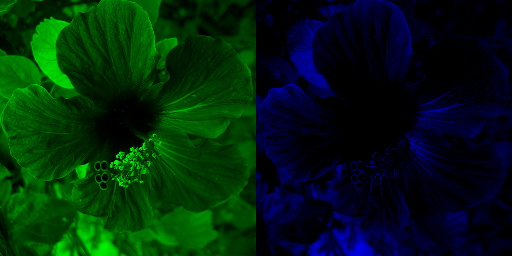

In [34]:
flor_BGR = cv.imread('/content/numerical-tours/python/nt_toolbox/data/hibiscus.bmp', cv.IMREAD_COLOR)
# Redimensionar la imagen y desactivar la interpolación
n = 256
flor_BGR = cv.resize(flor_BGR, (n, n), interpolation=cv.INTER_NEAREST)

# Se separan los canales de colores con openCV, este devuelve 3
# Matrices una para cada banda de color
B, G, R = cv.split(flor_BGR)

zeros = np.zeros_like(B)
R = cv.merge([zeros, zeros, R])
G = cv.merge([zeros, G, zeros])
B = cv.merge([B, zeros, zeros])

#Se muestran las bandas de colores concatenadas
cv2_imshow(cv.hconcat((flor_BGR, R)))
cv2_imshow(cv.hconcat((G,B)))


>- CMY Color Space

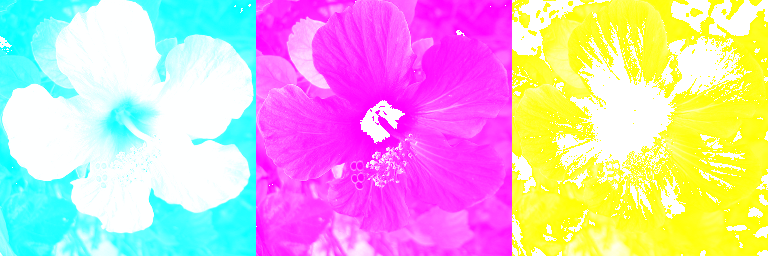

In [29]:
#Aplicamos lo explicado en la guia ya que OpenCV no tiene una funcion para CMY
c = 1.0 - R   # Canal cian
m = 1.0 - G  # Canal magenta
y = 1.0 - B   # Canal amarillo

# para visualizar cada una de las bandas por separado multiplicamos por 255 
# cada una de las bandas de colores  

cian = c * 255.0
cian = cian.astype('uint8')

magenta = m * 255.0
magenta = magenta.astype('uint8')

yellow = y* 255.0
yellow = yellow.astype('uint8')

#se muestran las imagenes en pantalla
cv2_imshow(cv.hconcat((cian, magenta, yellow)))

>- YUV Color Space

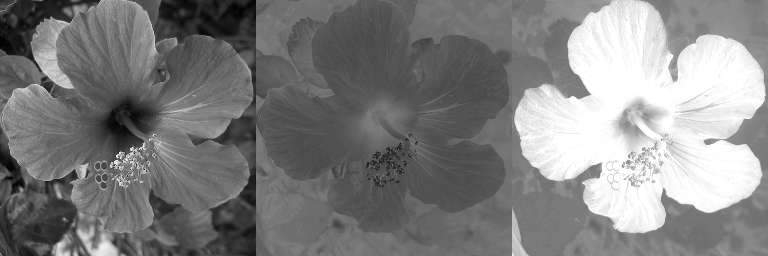

In [30]:
# OpenCV convierte una imagen BGR a YUV
flor_yuv = cv.cvtColor(flor_BGR, cv.COLOR_BGR2YUV)

#Separamos las bandas para visualizarlas
y, u, v = cv.split(flor_yuv)

#Se visualiza cada una de las bandas
cv2_imshow(cv.hconcat((y, u, v)))

>- HSV Color Space

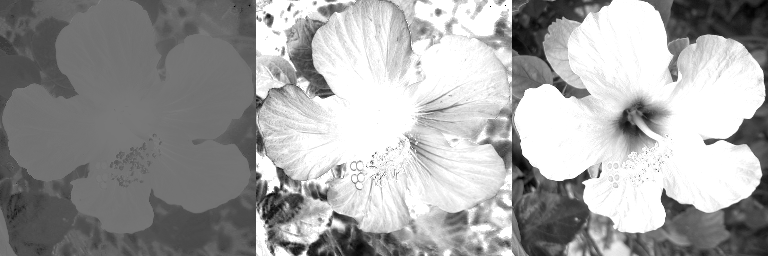

In [37]:
#funcion de OpenCV que combierte de RGB a HSV
flor_hsv = cv.cvtColor(flor_BGR, cv.COLOR_RGB2HSV)

# Separar las bandas H, S y V de la imagen
h, s, v = cv.split(flor_hsv)

#Visualiza las bandas concatenadas 
cv2_imshow(cv.hconcat((h,s,v)))

>- Color Histograms

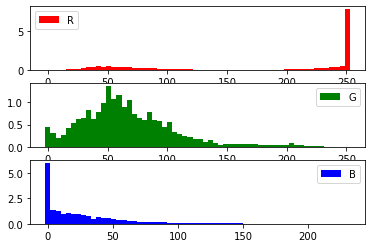

In [38]:
# Escoger canal de iamgen
def channel(f, i):
    return np.reshape(f[:,:,i], -1)

#Se convierte a RGB ya que se a estado trabajando en BGR
flor_RGB = cv.cvtColor(flor_BGR, cv.COLOR_BGR2RGB)

# define Q (cantidad de barras), c (Colores) and lgd (etiquetas)
Q = 60
c = ['r', 'g', 'b']
lgd = ['R', 'G', 'B']

# Muestra los histograma por canal
for i in range(3):
    plt.subplot(3, 1, i+1)
    h, t = np.histogram(channel(flor_RGB, i), bins=Q)
    plt.bar(t[:-1], h*Q/flor_BGR.size, width=(t[1]-t[0]), color=c[i])
    plt.axis('tight')
    plt.legend([lgd[i]])

plt.show()


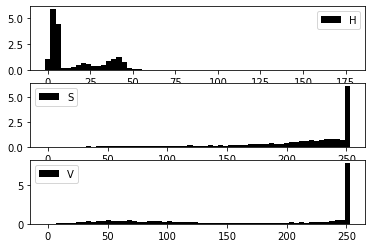

In [27]:
# define Q (cantidad de barras), c (Colores) and lgd (etiquetas)
Q = 60
c = ['k', 'k', 'k']
lgd = ['H', 'S', 'V']

# Muestra los histograma por canal
for i in range(3):
    plt.subplot(3, 1, i+1)
    h, t = np.histogram(channel(flor_hsv, i), bins=Q)
    plt.bar(t[:-1], h*Q/flor_BGR.size, width=(t[1]-t[0]), color=c[i])
    plt.axis('tight')
    plt.legend([lgd[i]])

plt.show()
